In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import itertools as it
import sys
import progressbar

folder_scaling = "data_FS_paper_loc/"

In [2]:
!ls $folder_scaling


dat_N_11_p_0.000000_S_1__0.txt	 dat_N_19_p_0.200000_S_4__13.txt
dat_N_11_p_0.000000_S_1__1.txt	 dat_N_19_p_0.200000_S_4__14.txt
dat_N_11_p_0.000000_S_1__10.txt  dat_N_19_p_0.200000_S_4__15.txt
dat_N_11_p_0.000000_S_1__2.txt	 dat_N_19_p_0.200000_S_4__16.txt
dat_N_11_p_0.000000_S_1__3.txt	 dat_N_19_p_0.200000_S_4__17.txt
dat_N_11_p_0.000000_S_1__4.txt	 dat_N_19_p_0.200000_S_4__18.txt
dat_N_11_p_0.000000_S_1__5.txt	 dat_N_19_p_0.200000_S_4__2.txt
dat_N_11_p_0.000000_S_1__6.txt	 dat_N_19_p_0.200000_S_4__3.txt
dat_N_11_p_0.000000_S_1__7.txt	 dat_N_19_p_0.200000_S_4__4.txt
dat_N_11_p_0.000000_S_1__8.txt	 dat_N_19_p_0.200000_S_4__5.txt
dat_N_11_p_0.000000_S_1__9.txt	 dat_N_19_p_0.200000_S_4__6.txt
dat_N_11_p_0.000000_S_2__0.txt	 dat_N_19_p_0.200000_S_4__7.txt
dat_N_11_p_0.000000_S_2__1.txt	 dat_N_19_p_0.200000_S_4__8.txt
dat_N_11_p_0.000000_S_2__10.txt  dat_N_19_p_0.200000_S_4__9.txt
dat_N_11_p_0.000000_S_2__2.txt	 dat_N_19_p_0.400000_S_1__0.txt
dat_N_11_p_0.000000_S_2__3.txt	 dat_N_19_p_0.40

dat_N_17_p_1.200000_S_4__15.txt  dat_N_23_p_2.000000_S_3__12.txt
dat_N_17_p_1.200000_S_4__16.txt  dat_N_23_p_2.000000_S_3__13.txt
dat_N_17_p_1.200000_S_4__2.txt	 dat_N_23_p_2.000000_S_3__2.txt
dat_N_17_p_1.200000_S_4__3.txt	 dat_N_23_p_2.000000_S_3__3.txt
dat_N_17_p_1.200000_S_4__4.txt	 dat_N_23_p_2.000000_S_3__4.txt
dat_N_17_p_1.200000_S_4__5.txt	 dat_N_23_p_2.000000_S_3__5.txt
dat_N_17_p_1.200000_S_4__6.txt	 dat_N_23_p_2.000000_S_3__6.txt
dat_N_17_p_1.200000_S_4__7.txt	 dat_N_23_p_2.000000_S_3__7.txt
dat_N_17_p_1.200000_S_4__8.txt	 dat_N_23_p_2.000000_S_3__8.txt
dat_N_17_p_1.200000_S_4__9.txt	 dat_N_23_p_2.000000_S_3__9.txt
dat_N_17_p_1.400000_S_1__0.txt	 dat_N_23_p_2.000000_S_4__0.txt
dat_N_17_p_1.400000_S_1__1.txt	 dat_N_23_p_2.000000_S_4__1.txt
dat_N_17_p_1.400000_S_1__10.txt  dat_N_23_p_2.000000_S_4__10.txt
dat_N_17_p_1.400000_S_1__11.txt  dat_N_23_p_2.000000_S_4__11.txt
dat_N_17_p_1.400000_S_1__12.txt  dat_N_23_p_2.000000_S_4__12.txt
dat_N_17_p_1.400000_S_1__13.txt  dat_N_23_p_2

In [3]:
v_N = np.arange(11,24,2)
v_p = np.linspace(0.,2.,11)
v_S = np.array([1,2,3,4])

N_N = v_N.size
N_p = v_p.size
N_S = v_S.size

prefix = "dat"
suffix = ".txt"

In [4]:
data_list_scaled = []
err_list_scaled = []
num_list = []

# the loop with progress bar
bar = progressbar.ProgressBar(maxval=N_N*N_p, \
widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])

count = 0
bar.start()   

for i_N in range(N_N):
    N = v_N[i_N]
    dat_N = np.zeros((N_p,N_S,N+1,N+1))
    err_N = np.zeros((N_p,N_S,N+1,N+1))
    num_N = np.zeros((N_p,N))
    for i_p in range(N_p):
        p = v_p[i_p]
        for i_S in range(N_S):
            S = v_S[i_S]
            for i in range(N):
                fn = folder_scaling + prefix + "_N_" + str(N) + "_p_" + "{:.6f}".format(p) + "_S_" + str(S) + "__" + str(i) + suffix

                try:
                    data = np.loadtxt(fn)
                except:
                    data = -np.ones(2,N+1)
                    print("file " + fn + " does not exist")

                num_N[i_p,i] = data.shape[0]

                dat_N[i_p,i_S,i+1,:] = np.mean(data,axis=0)
                err_N[i_p,i_S,i+1,:] = np.std(data,axis=0)/np.sqrt(num_N[i_p,i])
            
        count += 1
        bar.update(count)
        
    data_list_scaled.append(dat_N)
    err_list_scaled.append(err_N)
    num_list.append(num_N)

bar.finish()
    

file data_FS_paper_loc/dat_N_23_p_0.200000_S_1__13.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.200000_S_1__14.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.200000_S_1__15.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.200000_S_1__16.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.200000_S_1__17.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.200000_S_1__18.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.200000_S_1__19.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.200000_S_1__20.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.200000_S_1__21.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.200000_S_1__22.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.200000_S_2__13.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.200000_S_2__14.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.200000_S_2__15.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.200000_S_2__16.txt does not exist
file data_FS_paper_l

file data_FS_paper_loc/dat_N_23_p_0.200000_S_4__13.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.200000_S_4__14.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.200000_S_4__15.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.200000_S_4__16.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.200000_S_4__17.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.200000_S_4__18.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.200000_S_4__19.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.200000_S_4__20.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.200000_S_4__21.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.200000_S_4__22.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.400000_S_1__13.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.400000_S_1__14.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.400000_S_1__15.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.400000_S_1__16.txt does not exist
file data_FS_paper_l

file data_FS_paper_loc/dat_N_23_p_0.400000_S_4__13.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.400000_S_4__14.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.400000_S_4__15.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.400000_S_4__16.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.400000_S_4__17.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.400000_S_4__18.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.400000_S_4__19.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.400000_S_4__20.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.400000_S_4__21.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.400000_S_4__22.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.600000_S_1__13.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.600000_S_1__14.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.600000_S_1__15.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.600000_S_1__16.txt does not exist
file data_FS_paper_l

file data_FS_paper_loc/dat_N_23_p_0.600000_S_4__13.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.600000_S_4__14.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.600000_S_4__15.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.600000_S_4__16.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.600000_S_4__17.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.600000_S_4__18.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.600000_S_4__19.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.600000_S_4__20.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.600000_S_4__21.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.600000_S_4__22.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.800000_S_1__13.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.800000_S_1__14.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.800000_S_1__15.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.800000_S_1__16.txt does not exist
file data_FS_paper_l

file data_FS_paper_loc/dat_N_23_p_0.800000_S_4__13.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.800000_S_4__14.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.800000_S_4__15.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.800000_S_4__16.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.800000_S_4__17.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.800000_S_4__18.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.800000_S_4__19.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.800000_S_4__20.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.800000_S_4__21.txt does not exist
file data_FS_paper_loc/dat_N_23_p_0.800000_S_4__22.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.000000_S_1__13.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.000000_S_1__14.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.000000_S_1__15.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.000000_S_1__16.txt does not exist
file data_FS_paper_l

file data_FS_paper_loc/dat_N_23_p_1.000000_S_4__13.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.000000_S_4__14.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.000000_S_4__15.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.000000_S_4__16.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.000000_S_4__17.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.000000_S_4__18.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.000000_S_4__19.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.000000_S_4__20.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.000000_S_4__21.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.000000_S_4__22.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.200000_S_1__14.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.200000_S_1__15.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.200000_S_1__16.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.200000_S_1__17.txt does not exist
file data_FS_paper_l

file data_FS_paper_loc/dat_N_23_p_1.200000_S_4__14.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.200000_S_4__15.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.200000_S_4__16.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.200000_S_4__17.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.200000_S_4__18.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.200000_S_4__19.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.200000_S_4__20.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.200000_S_4__21.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.200000_S_4__22.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.400000_S_1__14.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.400000_S_1__15.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.400000_S_1__16.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.400000_S_1__17.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.400000_S_1__18.txt does not exist
file data_FS_paper_l

file data_FS_paper_loc/dat_N_23_p_1.400000_S_4__14.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.400000_S_4__15.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.400000_S_4__16.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.400000_S_4__17.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.400000_S_4__18.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.400000_S_4__19.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.400000_S_4__20.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.400000_S_4__21.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.400000_S_4__22.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.600000_S_1__14.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.600000_S_1__15.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.600000_S_1__16.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.600000_S_1__17.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.600000_S_1__18.txt does not exist
file data_FS_paper_l

file data_FS_paper_loc/dat_N_23_p_1.600000_S_4__14.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.600000_S_4__15.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.600000_S_4__16.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.600000_S_4__17.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.600000_S_4__18.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.600000_S_4__19.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.600000_S_4__20.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.600000_S_4__21.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.600000_S_4__22.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.800000_S_1__13.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.800000_S_1__14.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.800000_S_1__15.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.800000_S_1__16.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.800000_S_1__17.txt does not exist
file data_FS_paper_l

file data_FS_paper_loc/dat_N_23_p_1.800000_S_4__13.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.800000_S_4__14.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.800000_S_4__15.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.800000_S_4__16.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.800000_S_4__17.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.800000_S_4__18.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.800000_S_4__19.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.800000_S_4__20.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.800000_S_4__21.txt does not exist
file data_FS_paper_loc/dat_N_23_p_1.800000_S_4__22.txt does not exist
file data_FS_paper_loc/dat_N_23_p_2.000000_S_1__14.txt does not exist
file data_FS_paper_loc/dat_N_23_p_2.000000_S_1__15.txt does not exist
file data_FS_paper_loc/dat_N_23_p_2.000000_S_1__16.txt does not exist
file data_FS_paper_loc/dat_N_23_p_2.000000_S_1__17.txt does not exist
file data_FS_paper_l

file data_FS_paper_loc/dat_N_23_p_2.000000_S_4__14.txt does not exist
file data_FS_paper_loc/dat_N_23_p_2.000000_S_4__15.txt does not exist
file data_FS_paper_loc/dat_N_23_p_2.000000_S_4__16.txt does not exist
file data_FS_paper_loc/dat_N_23_p_2.000000_S_4__17.txt does not exist
file data_FS_paper_loc/dat_N_23_p_2.000000_S_4__18.txt does not exist
file data_FS_paper_loc/dat_N_23_p_2.000000_S_4__19.txt does not exist
file data_FS_paper_loc/dat_N_23_p_2.000000_S_4__20.txt does not exist
file data_FS_paper_loc/dat_N_23_p_2.000000_S_4__21.txt does not exist
file data_FS_paper_loc/dat_N_23_p_2.000000_S_4__22.txt does not exist


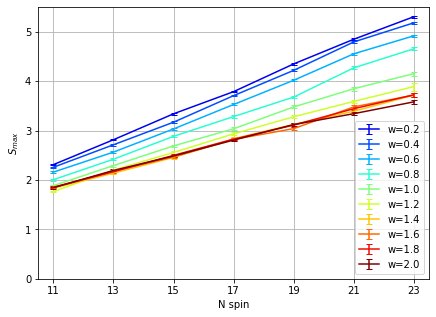

In [6]:
i_S = 0
figsize = (7,5)
i_p_start = 1

# The figure
plt.figure(figsize=figsize)

x_axis = v_N

#clr = ["black", "blue", "green", "orange","red","black", "cyan", "green", "orange","red","cyan"]
clr = plt.cm.jet(v_p/np.max(v_p))  

#trunc = [5,5,6,6] + [None for i in range(7)]
trunc = [None for i in range(N_p)]

for i_p in range(i_p_start,N_p):
    p = v_p[i_p]
    dat_plot = []
    dat_err = []
    
    for i_N in range(N_N):
        N = v_N[i_N]
        
        dat_sc = data_list_scaled[i_N][i_p][i_S]
        dat_scp = dat_sc[dat_sc > -1]
        
        err_sc = err_list_scaled[i_N][i_p][i_S]
        err_scp = err_sc[dat_sc > -1]
        
        ind = np.unravel_index(np.argmax(dat_scp, axis=None), dat_scp.shape)
        dat_plot.append(dat_scp[ind])
        dat_err.append(err_scp[ind])

        label = "w="+"{:.1f}".format(p)
        
    _ = plt.errorbar(v_N[:trunc[i_p]],dat_plot[:trunc[i_p]], yerr=dat_err[:trunc[i_p]], capsize=3, label=label, color=clr[i_p])


plt.ylim(bottom=0.)
plt.xlim(np.min(x_axis)-0.5, np.max(x_axis)+0.5)
plt.grid(True)

plt.xticks(v_N)

plt.xlabel("N spin")
plt.ylabel(r"$S_{max}$")
plt.legend()

#plt.savefig("figs_paper/Smax_N_scaled.pdf", bbox_inches='tight')

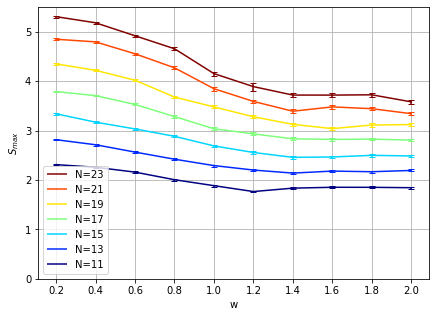

In [26]:
i_S = 0
figsize = (7,5)
i_p_start = 1

# The figure
plt.figure(figsize=figsize)

x_axis = v_N

#clr = ["black", "blue", "green", "orange","red","black", "cyan", "green", "orange","red","cyan"]
clr = plt.cm.jet( (v_N-np.min(v_N))/(np.max(v_N)-np.min(v_N)) )

#trunc = [5,5,6,6] + [None for i in range(7)]
#trunc = [None for i in range(N_p)]
labels = []
for i_N, N in enumerate(v_N):
    dat_plot = []
    dat_err = []
    
    for i_p in range(i_p_start,N_p):
        p = v_p[i_p]
        
        dat_sc = data_list_scaled[i_N][i_p][i_S]
        dat_scp = dat_sc[dat_sc > -1]
        
        err_sc = err_list_scaled[i_N][i_p][i_S]
        err_scp = err_sc[dat_sc > -1]
        
        ind = np.unravel_index(np.argmax(dat_scp, axis=None), dat_scp.shape)
        dat_plot.append(dat_scp[ind])
        dat_err.append(err_scp[ind])

    labels.append("N="+str(N) )   
    _ = plt.errorbar(v_p[i_p_start:],dat_plot, yerr=dat_err, capsize=3, label=labels[i_N], color=clr[i_N])


plt.ylim(bottom=0.)
#plt.xlim(np.min(x_axis)-0.5, np.max(x_axis)+0.5)
plt.grid(True)
plt.xticks(v_p[i_p_start:])


plt.xlabel("w")
plt.ylabel(r"$S_{max}$")
plt.legend(reversed(plt.legend().legendHandles), reversed(labels))


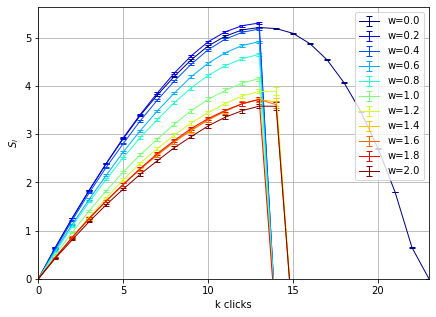

In [7]:
N_plot = 23
i_site = (N_plot+1)//2
i_S = 0

# The figure
plt.figure(figsize=figsize)

i_N = np.argmin(np.abs(v_N-N_plot))
x_axis = np.linspace(0,N_plot,N_plot+1)


for i_p in range(N_p):
    p = v_p[i_p]
    dat = data_list_scaled[i_N][i_p,i_S,:,i_site]
    err = err_list_scaled[i_N][i_p,i_S,:,i_site]
    
    label = "w="+"{:.1f}".format(p)

    #_ = plt.errorbar(x_axis,0.5*(dat+np.flip(dat)), yerr=err_S[i_L,i_jump,:], linewidth = 1, color = 'black')
    _ = plt.errorbar(x_axis,dat , yerr=err, linewidth = 1, capsize=3, label=label, color=clr[i_p])
    #_ = plt.plot(x_axis,dat, linewidth = 1, color='blue')

plt.xlim(0,N_plot)
plt.ylim(bottom=0.)
plt.grid(True)

plt.xlabel("k clicks")
plt.ylabel(r"$S_l$")
plt.legend()
#plt.title("N="+str(N_plot))

#plt.savefig("figs_paper/S_half_" + str(N_plot) + "_scaled.pdf", bbox_inches='tight')

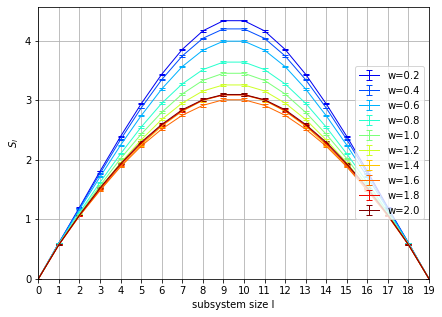

In [8]:
N_plot = 19

i_S = 0
i_p_start= 1
i_jump = [11]

plt.figure(figsize=figsize)

i_N = np.argmin(np.abs(v_N-N_plot))

x_axis = np.linspace(0,N_plot,N_plot+1)


for i_p in range(i_p_start,N_p):
    p = v_p[i_p]
    #i_jump = np.unravel_index(np.argmax(data_list_scaled[i_N][i_p][i_S], axis=None), data_list_scaled[i_N][i_p][i_S].shape)
    dat = data_list_scaled[i_N][i_p,i_S,i_jump[0],:]
    err = err_list_scaled[i_N][i_p,i_S,i_jump[0],:]
    dat = 0.5*(dat+np.flip(dat))
    err = 0.5*np.sqrt(err**2+np.flip(err)**2)

    label = "w="+"{:.1f}".format(p)
    
    #_ = plt.errorbar(x_axis,0.5*(dat+np.flip(dat)), yerr=err_S[i_L,i_jump,:], linewidth = 1, color = 'black')
    _ = plt.errorbar(x_axis,dat , yerr=err, linewidth = 1, capsize=3, label=label, color=clr[i_p])
    #_ = plt.plot(x_axis,dat, linewidth = 1, color='blue')

plt.xlim(0,N_plot)
plt.xticks(range(N_plot+1))
plt.ylim(bottom=0.)
plt.grid(True)

plt.xlabel("subsystem size l")
plt.ylabel(r"$S_l$")
plt.legend(loc="right")
#plt.title("N="+str(N_plot))

#plt.savefig("figs_paper/St_" + str(N_plot) + "_" + str(i_jump) + "_scaled.pdf", bbox_inches='tight')

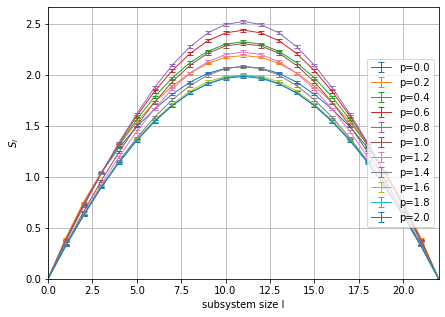

In [12]:
N_plot = 22

i_S = 0
i_p_start= 0

plt.figure(figsize=figsize)

i_N = np.argmin(np.abs(v_N-N_plot))

x_axis = np.linspace(0,N_plot,N_plot+1)


for i_p in range(i_p_start,N_p):
    p = v_p[i_p]
    #i_jump = np.unravel_index(np.argmax(data_list_scaled[i_N][i_p][i_S], axis=None), data_list_scaled[i_N][i_p][i_S].shape)
    dat = np.mean(data_list_scaled[i_N][i_p,i_S,:,:], axis=0)
    err = np.mean(err_list_scaled[i_N][i_p,i_S,:,:], axis=0)
    dat = 0.5*(dat+np.flip(dat))
    err = 0.5*np.sqrt(err**2+np.flip(err)**2)

    label = "p="+"{:.1f}".format(p)
    
    #_ = plt.errorbar(x_axis,0.5*(dat+np.flip(dat)), yerr=err_S[i_L,i_jump,:], linewidth = 1, color = 'black')
    _ = plt.errorbar(x_axis,dat , yerr=err, linewidth = 1, capsize=3, label=label)
    #_ = plt.plot(x_axis,dat, linewidth = 1, color='blue')

plt.xlim(0,N_plot)
plt.ylim(bottom=0.)
plt.grid(True)

plt.xlabel("subsystem size l")
plt.ylabel(r"$S_l$")
plt.legend(loc="right")
#plt.title("N="+str(N_plot))

#plt.savefig("figs_paper/St_" + str(N_plot) + "_" + str(i_jump) + "_scaled.pdf", bbox_inches='tight')

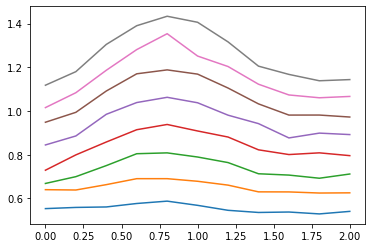

In [13]:
i_S = 0

for i_N, N in enumerate(v_N):
    v_std = []
    for i_p, p in enumerate(v_p):
        i_jump = np.unravel_index(np.argmax(data_list_scaled[i_N][i_p][i_S], axis=None), 
                                  data_list_scaled[i_N][i_p][i_S].shape)
        profile = data_list_scaled[i_N][i_p,i_S,i_jump[0],:]
        v_std.append( np.std(profile) )
        
    plt.plot(v_p,v_std)